## Libraries and Packages
 - Python version: 3.7.7
 - IPython version: 7.16.1
 - Pandas version: 1.0.5
 - SciKit Learn version: 0.23.1
 - Seaborn version: 0.11.1
 - MatplotLib version: 3.2.2
 - XGBoost version: 1.1.1
 - Imblearn version: 0.7.0
 - Seaborn version: 0.11.1
 - MatplotLib version: 3.2.2

In [31]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('preprocessed_df_with_cluster_names.pkl')

## Split Data

In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=10)

X_train = df_train.drop(columns=['cardinal_sym___tremor','cardinal_sym___brady',
                                 'cardinal_sym___reflex','cardinal_sym___rigid',
                                 'cardinal_sym___asymmetry','parktype_case'])

y_subtype_train = df_train['parktype_case']
y_trem_train = df_train['cardinal_sym___tremor']
y_brad_train = df_train['cardinal_sym___brady']
y_refl_train = df_train['cardinal_sym___reflex']
y_rigd_train = df_train['cardinal_sym___rigid']
y_asym_train = df_train['cardinal_sym___asymmetry']

X_test = df_test.drop(columns=['cardinal_sym___tremor','cardinal_sym___brady',
                                 'cardinal_sym___reflex','cardinal_sym___rigid',
                                 'cardinal_sym___asymmetry','parktype_case'])

y_subtype_test = df_test['parktype_case']
y_trem_test = df_test['cardinal_sym___tremor']
y_brad_test = df_test['cardinal_sym___brady']
y_refl_test = df_test['cardinal_sym___reflex']
y_rigd_test = df_test['cardinal_sym___rigid']
y_asym_test = df_test['cardinal_sym___asymmetry']

## Balance all Datasets

No need to balance the disease subtype classifer. Rather, just simple use a one-vs-rest classifier implementation. However, we do need to balance the separate cardinal symptom classifiers.

In [4]:
trem_cntr = Counter(y_trem_train)
brad_cntr = Counter(y_brad_train)
refl_cntr = Counter(y_refl_train)
rigd_cntr = Counter(y_rigd_train)
asym_cntr = Counter(y_asym_train)

In [5]:
print('Tremor Total Count:                 '+str(len(y_trem_train)))
print('Bradykinesia Total Count:           '+str(len(y_brad_train)))
print('Reflex Total Count:                 '+str(len(y_refl_train)))
print('Rigidity Total Count:               '+str(len(y_rigd_train)))
print('Asymmetry Total Count:              '+str(len(y_asym_train)))
print('')
print('Tremor Minority Count):             '+str(trem_cntr[0.0]))
print('Bradykinesia Minority Count):       '+str(brad_cntr[0.0]))
print('Reflex Minority Count:              '+str(refl_cntr[1.0]))
print('Rigidity Minority Count:            '+str(rigd_cntr[0.0]))
print('Asymmetry Minority Count:           '+str(asym_cntr[0.0]))
print('')
print('Tremor Majority Count:              '+str(trem_cntr[1.0]))
print('Bradykinesia Majority Count:        '+str(brad_cntr[1.0]))
print('Reflex Majority Count:              '+str(refl_cntr[0.0]))
print('Rigidity Majority Count:            '+str(rigd_cntr[1.0]))
print('Asymmetry Majority Count:           '+str(asym_cntr[1.0]))
print('')
print('Tremor (minority/majority):         '+str(round(trem_cntr[0.0]/trem_cntr[1.0], 3)))
print('Bradykinesia (minority/majority):   '+str(round(brad_cntr[0.0]/brad_cntr[1.0], 3)))
print('Reflex (minority/majority):         '+str(round(refl_cntr[1.0]/refl_cntr[0.0], 3)))
print('Rigidity (minority/majority):       '+str(round(rigd_cntr[0.0]/rigd_cntr[1.0], 3)))
print('Asymmetry (minority/majority):      '+str(round(asym_cntr[0.0]/asym_cntr[1.0], 3)))

Tremor Total Count:                 526
Bradykinesia Total Count:           526
Reflex Total Count:                 526
Rigidity Total Count:               526
Asymmetry Total Count:              526

Tremor Minority Count):             227
Bradykinesia Minority Count):       42
Reflex Minority Count:              215
Rigidity Minority Count:            101
Asymmetry Minority Count:           244

Tremor Majority Count:              299
Bradykinesia Majority Count:        484
Reflex Majority Count:              311
Rigidity Majority Count:            425
Asymmetry Majority Count:           282

Tremor (minority/majority):         0.759
Bradykinesia (minority/majority):   0.087
Reflex (minority/majority):         0.691
Rigidity (minority/majority):       0.238
Asymmetry (minority/majority):      0.865


In [6]:
import numpy as np
np.any(np.isnan(X_train))

False

In [7]:
# Disease Subtype
estimators = [RandomForestClassifier(),
              GaussianNB(),
              LogisticRegression(max_iter=1000),
              KNeighborsClassifier(),
              XGBClassifier()]

cm_dict = {}
sep = '()'
for estimator in estimators:
    clf = str(estimator)
    if len(clf) <= 50:
        clf = clf.split(sep, 1)[0]
    elif clf[:6] == 'Logist':
        clf = clf[:18]
    else:
        clf = clf[:13]
    ovr = OneVsRestClassifier(estimator=estimator)
    fitted_model = ovr.fit(X_train, y_subtype_train)
    preds = fitted_model.predict(X_test)
    cm = confusion_matrix(y_subtype_test, preds, labels=[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0])
    norm_cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    cm_dict[clf] = norm_cm

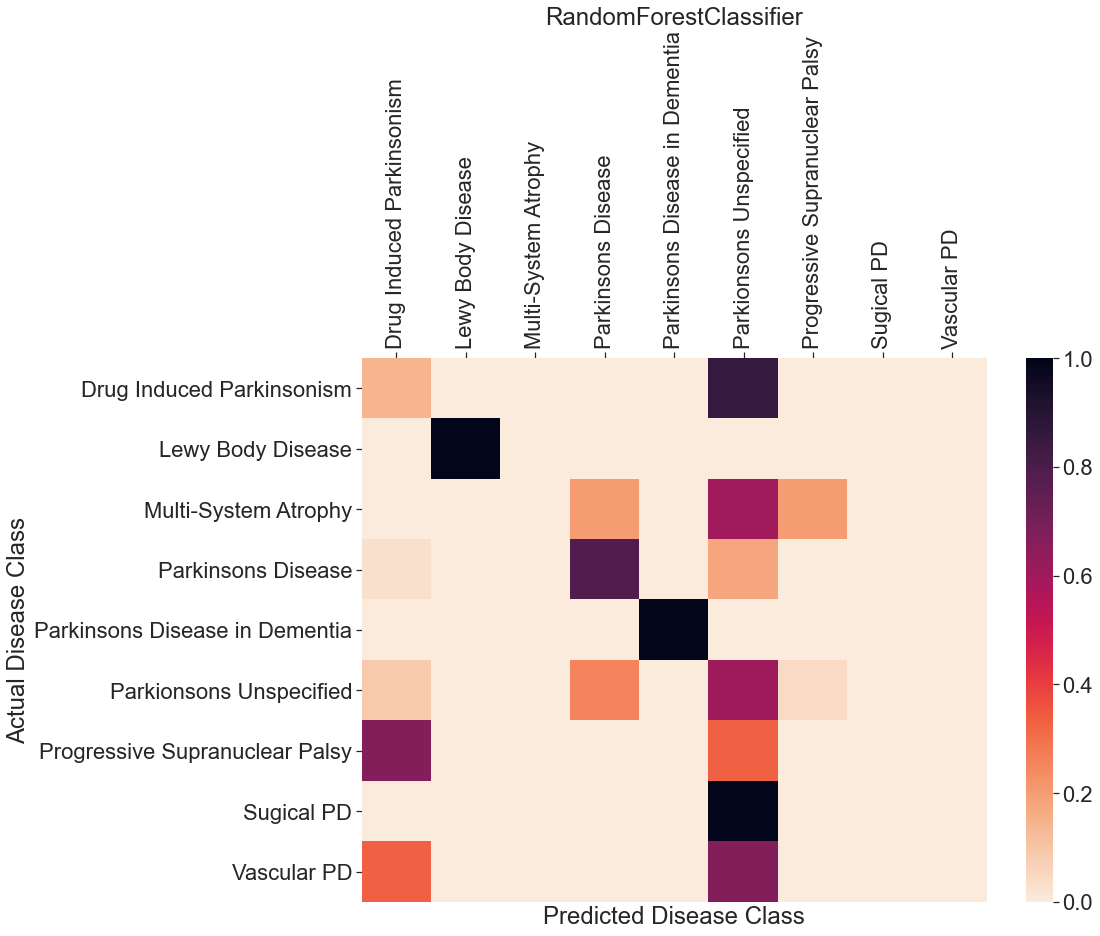

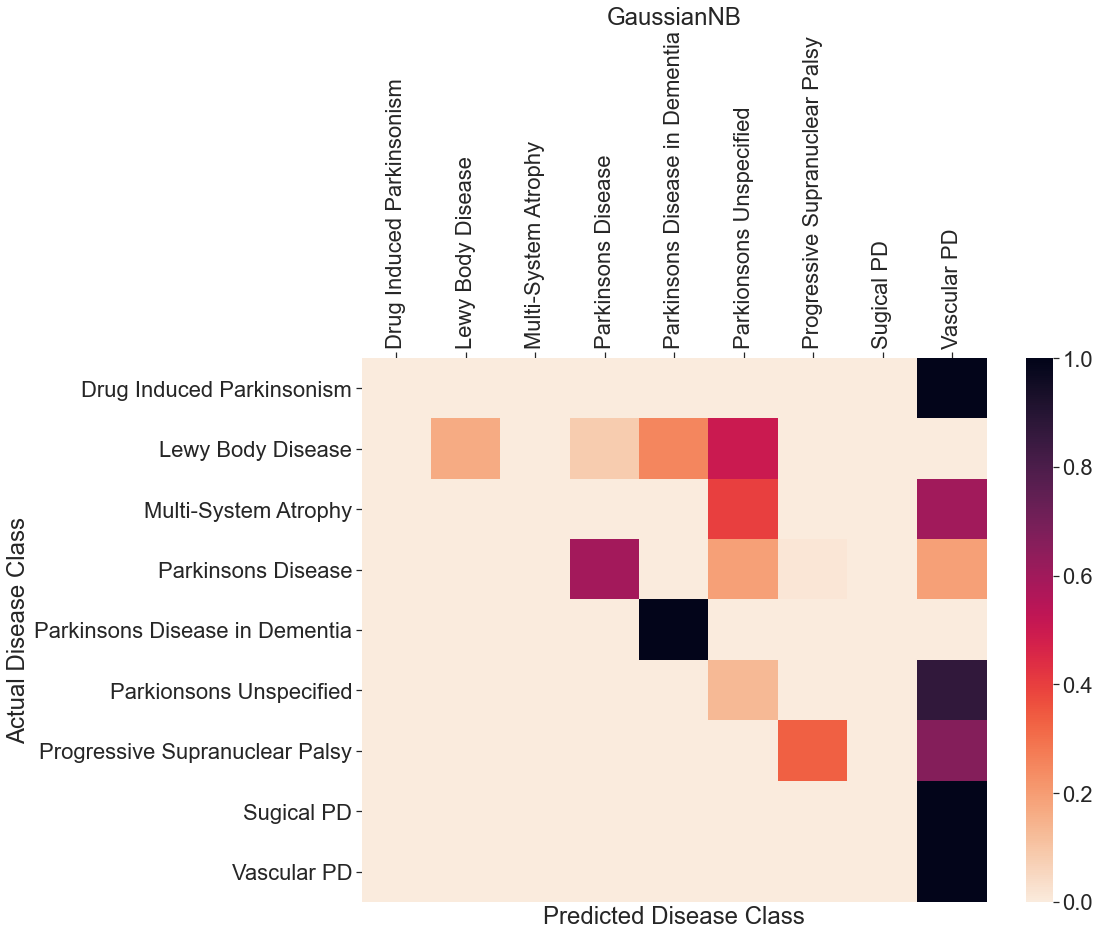

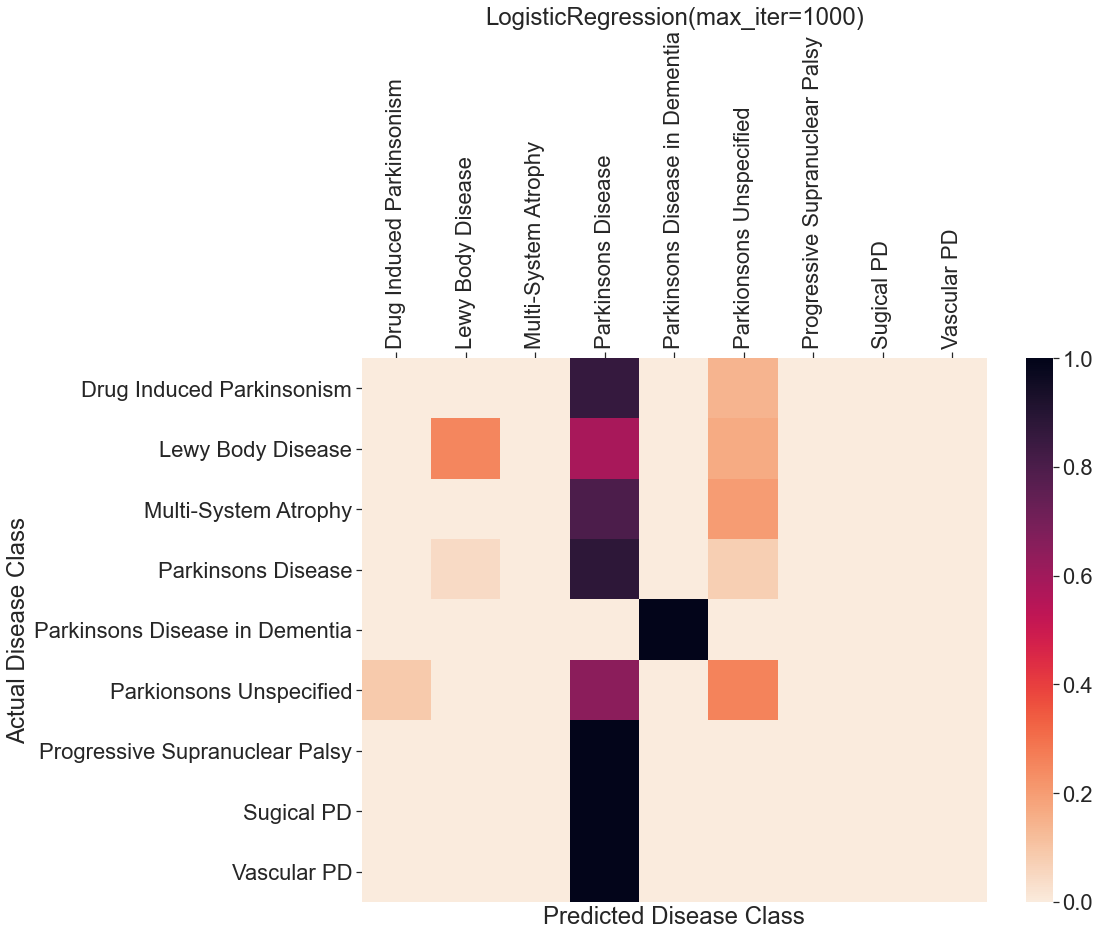

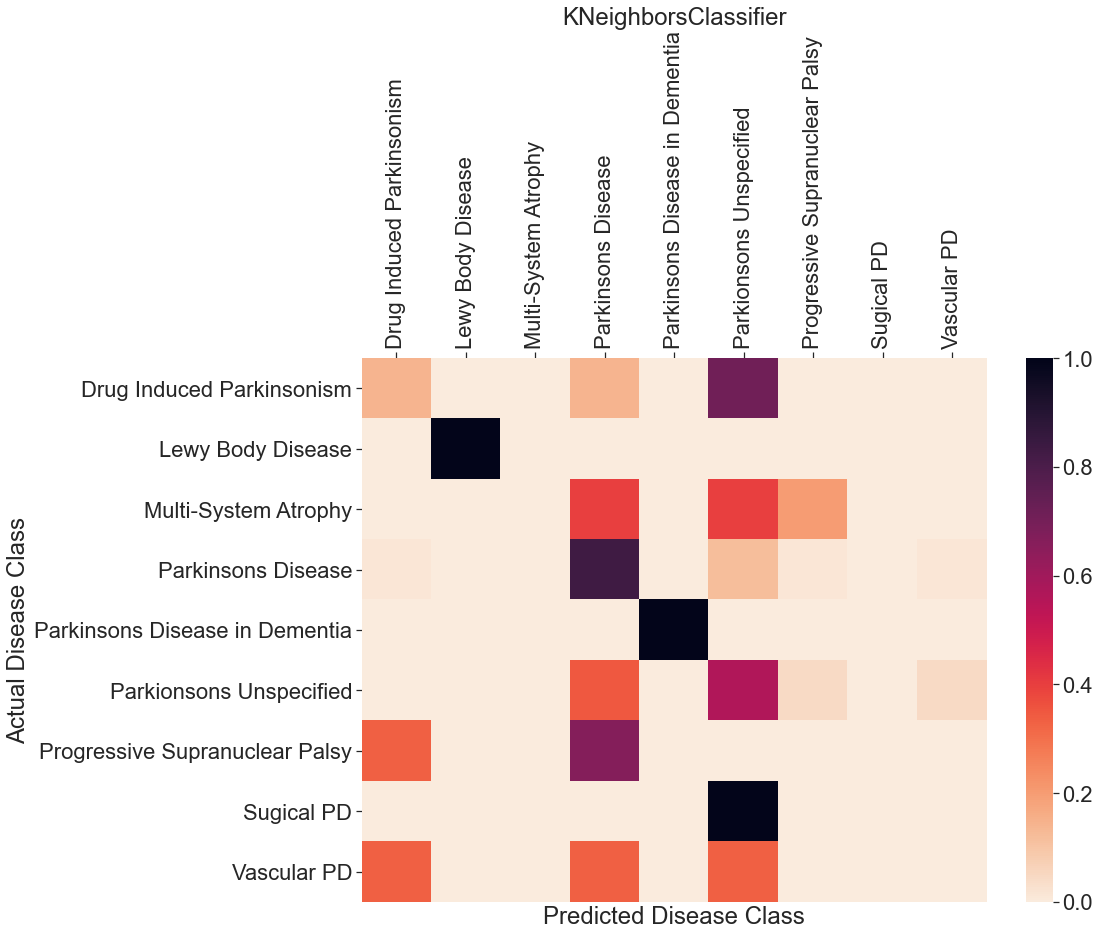

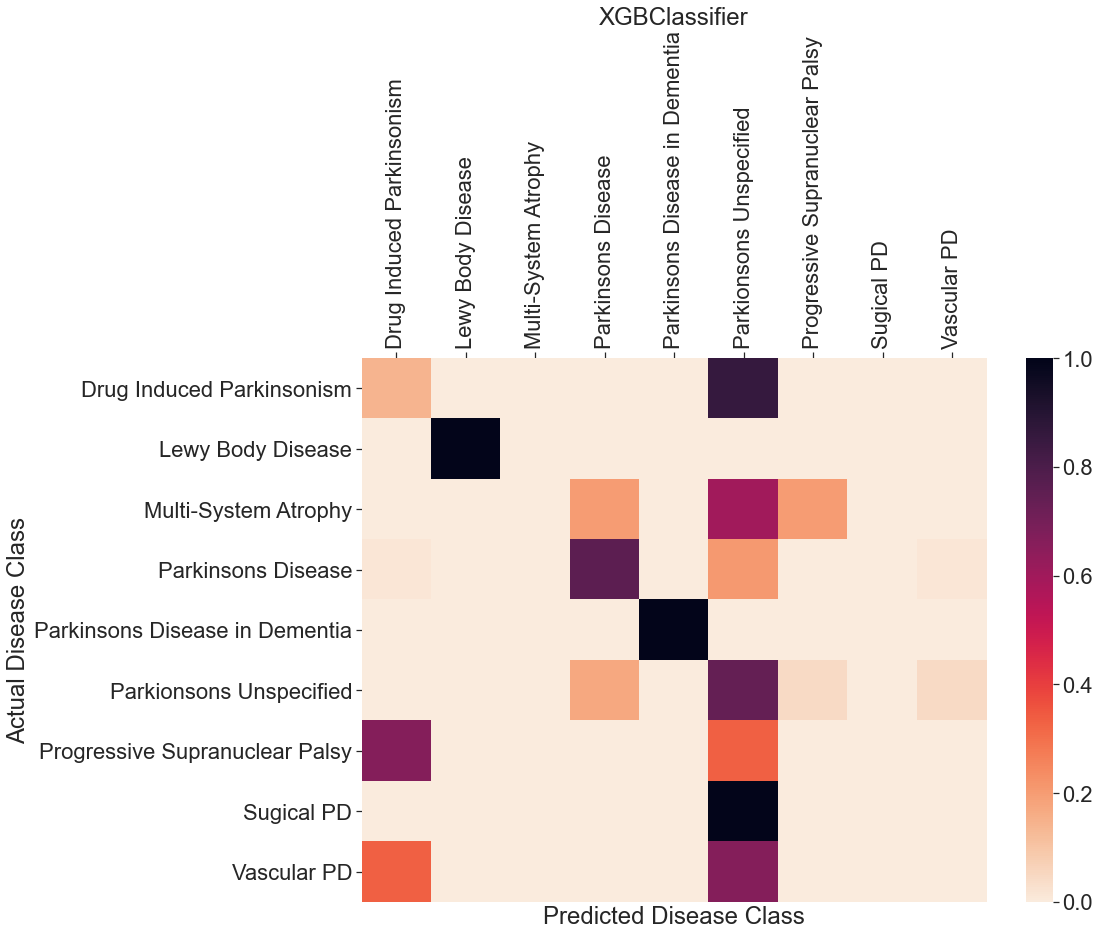

In [38]:
for key,val in cm_dict.items():
    maps = sns.color_palette('rocket_r', as_cmap=True)
    labels = ['Drug Induced Parkinsonism','Lewy Body Disease','Multi-System Atrophy',
              'Parkinsons Disease','Parkinsons Disease in Dementia','Parkionsons Unspecified',
              'Progressive Supranuclear Palsy','Sugical PD','Vascular PD']

    fig,ax = plt.subplots(figsize=(14,10))
    sns.heatmap(val, annot=False, cmap=maps, yticklabels=labels, xticklabels=labels).tick_params(
                left=True, right=False, bottom=False, top=True, labelbottom=False, labeltop=True,)
    ax.set_title(key)
    ax.set_xlabel('Predicted Disease Class')
    ax.set_ylabel('Actual Disease Class')
    plt.xticks(rotation=90)
    plt.show()

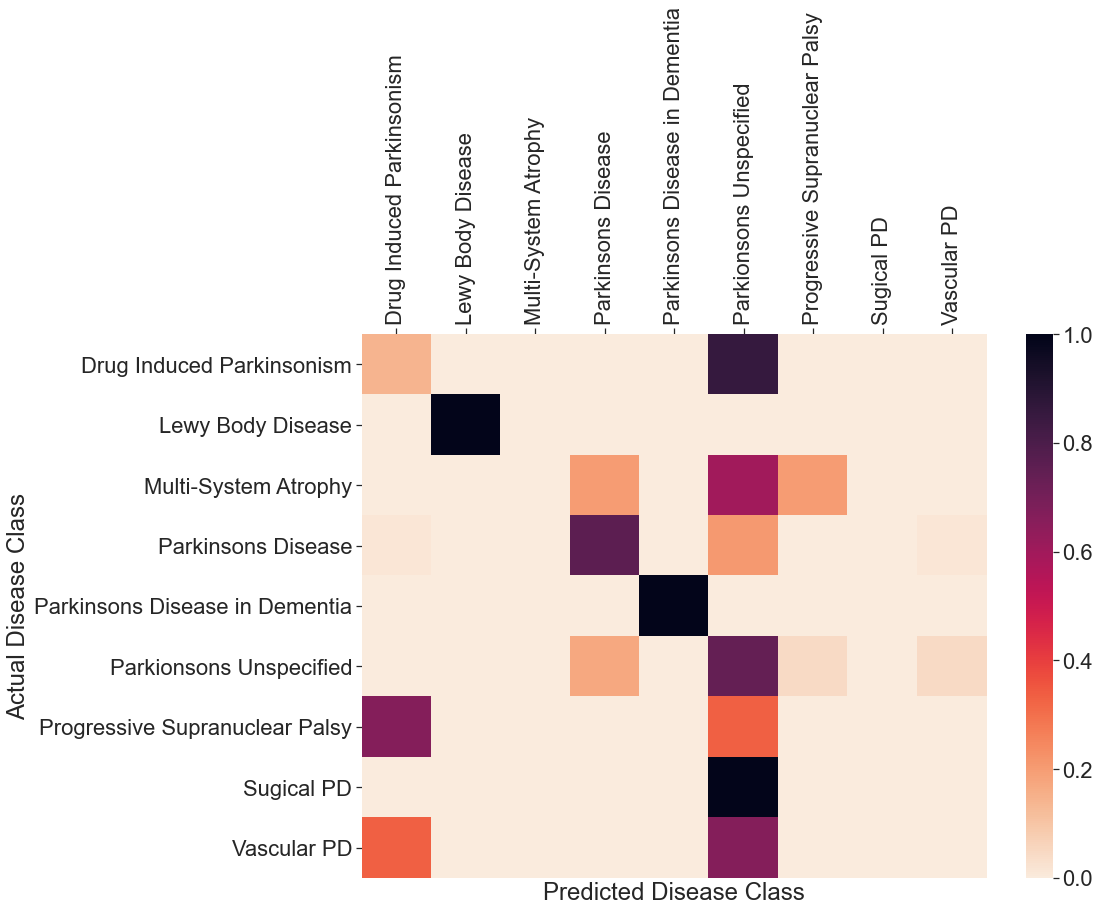

In [41]:
maps = sns.color_palette('rocket_r', as_cmap=True)
labels = ['Drug Induced Parkinsonism','Lewy Body Disease','Multi-System Atrophy',
          'Parkinsons Disease','Parkinsons Disease in Dementia','Parkionsons Unspecified',
          'Progressive Supranuclear Palsy','Sugical PD','Vascular PD']

fig,ax = plt.subplots(figsize=(14,10))
sns.heatmap(val, annot=False, cmap=maps, yticklabels=labels, xticklabels=labels).tick_params(
            left=True, right=False, bottom=False, top=True, labelbottom=False, labeltop=True,)
ax.set_xlabel('Predicted Disease Class')
ax.set_ylabel('Actual Disease Class')
plt.xticks(rotation=90)
plt.show()
plt.savefig('XGBoost_PD_subtype_classification.png', dpi=300)
plt.savefig('XGBoost_PD_subtype_classification.pdf', dpi=300)

In [47]:
# Rename columns to make the Feature Importance figure readable
new_names = ['Sex','DLB Dementia','Dyskinesia','Constipation','Anosmia','Synucleinopathy Type',
             'REM Sleep Disorder','REM Sleep without Atonia','Restless Leg Syndrome',
             'Obstructive Sleep Apnea','Primary Snoring','Narcolepsy','Insomnia','Hypersomnolence',
             'Hypnotic Medication Use','Erectile Dysfunction','Constipation Longstanding',
             'Anosmia Longstanding','Neurogenic Bladder','Neurogenic Longstanding','Race',
             'Clustering Labels']

X_train.columns = new_names

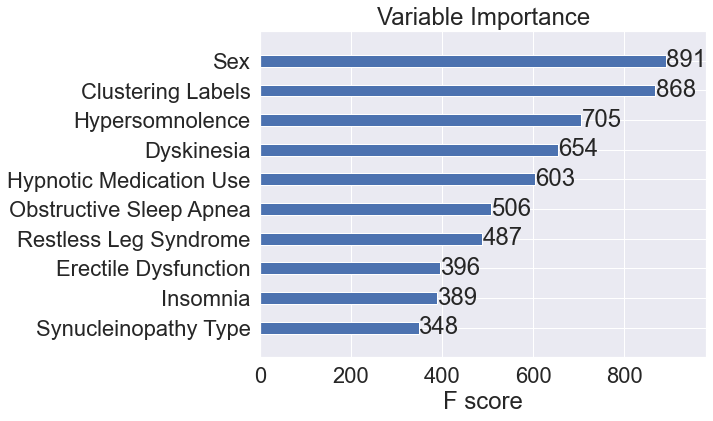

In [57]:
# Determine feature importance for XGBoost
xg = XGBClassifier()
xg.fit(X_train, y_subtype_train)

sns.set(font_scale=2)
plt.rcParams['figure.figsize']=(8,6)
plot_importance(xg, height=0.4, xlim=None, ylim=None, title='Variable Importance',
                xlabel='F score', ylabel=None, importance_type='weight', 
                max_num_features=10, grid=True, show_values=True)
plt.show()
plt.savefig('XGBoost_PD_subtype_feature_importance.png', dpi=300)
plt.savefig('XGBoost_PD_subtype_feature_importance.pdf', dpi=300)

In [9]:
# Brady
y_tr = y_brad_train
y_te = y_brad_test

brad_dict = {}
for estimator in estimators:
    clf = str(estimator)
    if len(clf) <= 30:
        clf = clf.split(sep, 1)[0]
    else:
        clf = clf[:13]
    imb_pipe = Pipeline([('sampler', RandomUnderSampler()),
                         ('classifier', estimator)])
    ovr = OneVsRestClassifier(imb_pipe)
    fitted_model = ovr.fit(X_train, y_tr)
    preds_train = fitted_model.predict(X_train)
    preds_test = fitted_model.predict(X_test)
    train_roc = roc_auc_score(y_tr, preds_train)
    test_roc = roc_auc_score(y_te, preds_test)
    train_label = clf+'_train_ROC'
    test_label = clf+'_test_ROC'
    brad_dict[train_label] = train_roc
    brad_dict[test_label] = test_roc

In [10]:
# Tremor
y_tr = y_trem_train
y_te = y_trem_test

trem_dict = {}
for estimator in estimators:
    clf = str(estimator)
    if len(clf) <= 30:
        clf = clf.split(sep, 1)[0]
    else:
        clf = clf[:13]
    imb_pipe = Pipeline([('sampler', RandomUnderSampler()),
                         ('classifier', estimator)])
    ovr = OneVsRestClassifier(imb_pipe)
    fitted_model = ovr.fit(X_train, y_tr)
    preds_train = fitted_model.predict(X_train)
    preds_test = fitted_model.predict(X_test)
    train_roc = roc_auc_score(y_tr, preds_train)
    test_roc = roc_auc_score(y_te, preds_test)
    train_label = clf+'_train_ROC'
    test_label = clf+'_test_ROC'
    trem_dict[train_label] = train_roc
    trem_dict[test_label] = test_roc

In [11]:
# Reflex
y_tr = y_refl_train
y_te = y_refl_test

refl_dict = {}
for estimator in estimators:
    clf = str(estimator)
    if len(clf) <= 30:
        clf = clf.split(sep, 1)[0]
    else:
        clf = clf[:13]
    imb_pipe = Pipeline([('sampler', RandomUnderSampler()),
                         ('classifier', estimator)])
    ovr = OneVsRestClassifier(imb_pipe)
    fitted_model = ovr.fit(X_train, y_tr)
    preds_train = fitted_model.predict(X_train)
    preds_test = fitted_model.predict(X_test)
    train_roc = roc_auc_score(y_tr, preds_train)
    test_roc = roc_auc_score(y_te, preds_test)
    train_label = clf+'_train_ROC'
    test_label = clf+'_test_ROC'
    refl_dict[train_label] = train_roc
    refl_dict[test_label] = test_roc

In [12]:
# Rigidity
y_tr = y_rigd_train
y_te = y_rigd_test

rigd_dict = {}
for estimator in estimators:
    clf = str(estimator)
    if len(clf) <= 30:
        clf = clf.split(sep, 1)[0]
    else:
        clf = clf[:13]
    imb_pipe = Pipeline([('sampler', RandomUnderSampler()),
                         ('classifier', estimator)])
    ovr = OneVsRestClassifier(imb_pipe)
    fitted_model = ovr.fit(X_train, y_tr)
    preds_train = fitted_model.predict(X_train)
    preds_test = fitted_model.predict(X_test)
    train_roc = roc_auc_score(y_tr, preds_train)
    test_roc = roc_auc_score(y_te, preds_test)
    train_label = clf+'_train_ROC'
    test_label = clf+'_test_ROC'
    rigd_dict[train_label] = train_roc
    rigd_dict[test_label] = test_roc

In [13]:
# Asymmetry
y_tr = y_asym_train
y_te = y_asym_test

asym_dict = {}
for estimator in estimators:
    clf = str(estimator)
    if len(clf) <= 30:
        clf = clf.split(sep, 1)[0]
    else:
        clf = clf[:13]
    imb_pipe = Pipeline([('sampler', RandomUnderSampler()),
                         ('classifier', estimator)])
    ovr = OneVsRestClassifier(imb_pipe)
    fitted_model = ovr.fit(X_train, y_tr)
    preds_train = fitted_model.predict(X_train)
    preds_test = fitted_model.predict(X_test)
    train_roc = roc_auc_score(y_tr, preds_train)
    test_roc = roc_auc_score(y_te, preds_test)
    train_label = clf+'_train_ROC'
    test_label = clf+'_test_ROC'
    asym_dict[train_label] = train_roc
    asym_dict[test_label] = test_roc

In [14]:
trem_dict

{'RandomForestClassifier_train_ROC': 0.8218805710665508,
 'RandomForestClassifier_test_ROC': 0.5064650196259524,
 'GaussianNB_train_ROC': 0.5147628659408011,
 'GaussianNB_test_ROC': 0.5012699145693834,
 'LogisticRegre_train_ROC': 0.5971373005466091,
 'LogisticRegre_test_ROC': 0.5579542830755022,
 'KNeighborsClassifier_train_ROC': 0.6250865587199623,
 'KNeighborsClassifier_test_ROC': 0.5143154006003232,
 'XGBClassifier_train_ROC': 0.8021820164130067,
 'XGBClassifier_test_ROC': 0.5520664973447241}

In [43]:
# Results
print('ROC Scores')
print('  In general, the closer to 1, the better the discriminative power of the algorithm.')
print('  If the value is 0.5, the algorithm is no better than a coin toss.')
print('  If the value is greater than 0.8, it is generally a reliable method.')
print('')
print('  The diffences between Training and Testing for each algorithm is critical. If the')
print('  difference is greater that 5% or so, the model is either over or underfit. this')
print('  means that the analysis is not fit for productionalizing.')
print('')
print('+--------------+--------+--------+--------+--------+--------+')
print('| Method       | Tremor | Brady  | Reflex | Rigid  | Asymm. |')
print('+==============+========+========+========+========+========+')
#print('+--------------+--------+--------+--------+--------+--------+')
print('| RF Training  | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['RandomForestClassifier_train_ROC'],3),
                                                                round(brad_dict['RandomForestClassifier_train_ROC'],3),
                                                                round(refl_dict['RandomForestClassifier_train_ROC'],3),
                                                                round(rigd_dict['RandomForestClassifier_train_ROC'],3),
                                                                round(asym_dict['RandomForestClassifier_train_ROC'],3)))
print('| RF Testing   | {}  | {}  | {}   | {}  | {}  |'.format(round(trem_dict['RandomForestClassifier_test_ROC'],3),
                                                                round(brad_dict['RandomForestClassifier_test_ROC'],3),
                                                                round(refl_dict['RandomForestClassifier_test_ROC'],3),
                                                                round(rigd_dict['RandomForestClassifier_test_ROC'],3),
                                                                round(asym_dict['RandomForestClassifier_test_ROC'],3)))
print('+--------------+--------+--------+--------+--------+--------+')
print('| NB Training  | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['GaussianNB_train_ROC'],3),
                                                                round(brad_dict['GaussianNB_train_ROC'],3),
                                                                round(refl_dict['GaussianNB_train_ROC'],3),
                                                                round(rigd_dict['GaussianNB_train_ROC'],3),
                                                                round(asym_dict['GaussianNB_train_ROC'],3)))
print('| NB Testing   | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['GaussianNB_test_ROC'],3),
                                                                round(brad_dict['GaussianNB_test_ROC'],3),
                                                                round(refl_dict['GaussianNB_test_ROC'],3),
                                                                round(rigd_dict['GaussianNB_test_ROC'],3),
                                                                round(asym_dict['GaussianNB_test_ROC'],3)))
print('+--------------+--------+--------+--------+--------+--------+')
print('| LR Training  | {}  | {}  | {}   | {}  | {}  |'.format(round(trem_dict['LogisticRegre_train_ROC'],3),
                                                                round(brad_dict['LogisticRegre_train_ROC'],3),
                                                                round(refl_dict['LogisticRegre_train_ROC'],3),
                                                                round(rigd_dict['LogisticRegre_train_ROC'],3),
                                                                round(asym_dict['LogisticRegre_train_ROC'],3)))
print('| LR Testing   | {}  | {}   | {}  | {}   | {}  |'.format(round(trem_dict['LogisticRegre_test_ROC'],3),
                                                                round(brad_dict['LogisticRegre_test_ROC'],3),
                                                                round(refl_dict['LogisticRegre_test_ROC'],3),
                                                                round(rigd_dict['LogisticRegre_test_ROC'],3),
                                                                round(asym_dict['LogisticRegre_test_ROC'],3)))
print('+--------------+--------+--------+--------+--------+--------+')
print('| KN Training  | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['KNeighborsClassifier_train_ROC'],3),
                                                                round(brad_dict['KNeighborsClassifier_train_ROC'],3),
                                                                round(refl_dict['KNeighborsClassifier_train_ROC'],3),
                                                                round(rigd_dict['KNeighborsClassifier_train_ROC'],3),
                                                                round(asym_dict['KNeighborsClassifier_train_ROC'],3)))
print('| KN Testing   | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['KNeighborsClassifier_test_ROC'],3),
                                                                round(brad_dict['KNeighborsClassifier_test_ROC'],3),
                                                                round(refl_dict['KNeighborsClassifier_test_ROC'],3),
                                                                round(rigd_dict['KNeighborsClassifier_test_ROC'],3),
                                                                round(asym_dict['KNeighborsClassifier_test_ROC'],3)))
print('+--------------+--------+--------+--------+--------+--------+')
print('| XG Training  | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['XGBClassifier_train_ROC'],3),
                                                                round(brad_dict['XGBClassifier_train_ROC'],3),
                                                                round(refl_dict['XGBClassifier_train_ROC'],3),
                                                                round(rigd_dict['XGBClassifier_train_ROC'],3),
                                                                round(asym_dict['XGBClassifier_train_ROC'],3)))
print('| XG Testing   | {}  | {}  | {}  | {}  | {}  |'.format(round(trem_dict['XGBClassifier_test_ROC'],3),
                                                                round(brad_dict['XGBClassifier_test_ROC'],3),
                                                                round(refl_dict['XGBClassifier_test_ROC'],3),
                                                                round(rigd_dict['XGBClassifier_test_ROC'],3),
                                                                round(asym_dict['XGBClassifier_test_ROC'],3)))
print('+--------------+--------+--------+--------+--------+--------+')

ROC Scores
  In general, the closer to 1, the better the discriminative power of the algorithm.
  If the value is 0.5, the algorithm is no better than a coin toss.
  If the value is greater than 0.8, it is generally a reliable method.

  The diffences between Training and Testing for each algorithm is critical. If the
  difference is greater that 5% or so, the model is either over or underfit. this
  means that the analysis is not fit for productionalizing.

+--------------+--------+--------+--------+--------+--------+
| Method       | Tremor | Brady  | Reflex | Rigid  | Asymm. |
+==============+========+========+========+========+========+
| RF Training  | 0.822  | 0.793  | 0.793  | 0.761  | 0.831  |
| RF Testing   | 0.506  | 0.418  | 0.54   | 0.509  | 0.583  |
+--------------+--------+--------+--------+--------+--------+
| NB Training  | 0.515  | 0.508  | 0.511  | 0.508  | 0.514  |
| NB Testing   | 0.501  | 0.539  | 0.492  | 0.515  | 0.472  |
+--------------+--------+--------+-------

### Conclusions

Random Forest and XGBoost are massively overfitting for all metrics. This is probably a function of too small of a sample size. Naive Bayes is essentially performing at random. Logistic regression and KNN are marginally better than random chance, but still overfitting.

This is essentially a bust. We can try to improve the ensemble learners with model tuning, but I don't think that the sample size is big enough to warrant it.